AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [18]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

# Create a Dataframe from the dataset
df = pd.DataFrame(titanic_data)

# Print the first 10 rows of the dataset
print("First 10 rows:")
print(df.head(10))

# Print the last 20 rows of the dataset
print("Last 20 rows:")
print(df.tail(20))

# Print dataset's information
print("Dataset Information:")
print(df.info())

# Describe the dataset
print("Dataset Description:")
print(df.describe())


First 10 rows:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


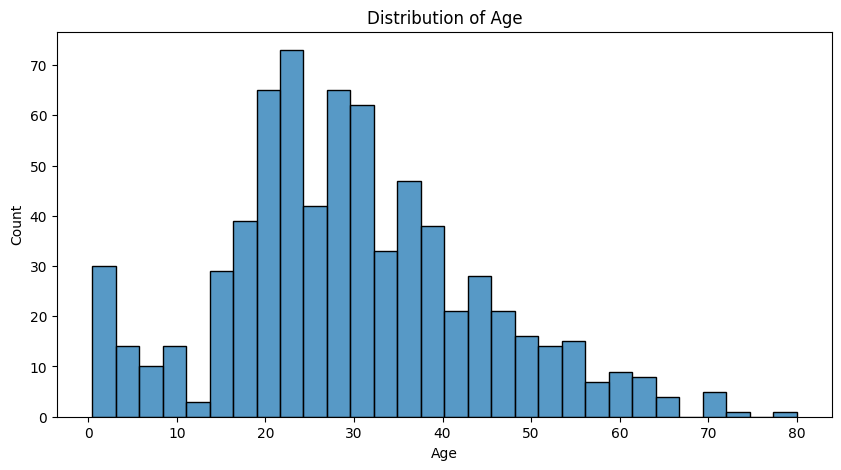

C:\Users\芮浩嘉\AppData\Local\Temp\ipykernel_24064\1667646660.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\芮浩嘉\AppData\Local\Temp\ipykernel_24064\1667646660.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# 1. Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# 2. For the 'Age' column, find the best way to handle the missing values
# 2.1. Use an appropriate plot to study the nature of the 'Age' column
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Distribution of Age')
plt.show()

# 2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# 2.3. Using the most suitable central tendency measure, fill the missing values in the age column
# Here we can use median since it is less sensitive to outliers and matches the distribution from the histogram
df['Age'].fillna(median_age, inplace=True)

# 3. Decide what is the best way to handle the missing values in the 'Cabin' columns
# Cabin has a lot of missing values, so we might drop this column or fill with a specific value like 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# 4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
# Embarked also has some missing values, we can fill with the most common value (mode)
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# 5. Handle the incorrect data under the 'Survived' columns using appropriate measure
# Survived should be a binary column (0 or 1), if not, we need to correct it
df['Survived'] = df['Survived'].apply(lambda x: 1 if x == 'Yes' else 0)

# 6. Handle the incorrectly formatted data under the 'Fare' column
# Fare should be a numerical column, if not, we need to correct it
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'].fillna(df['Fare'].mean(), inplace=True)


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

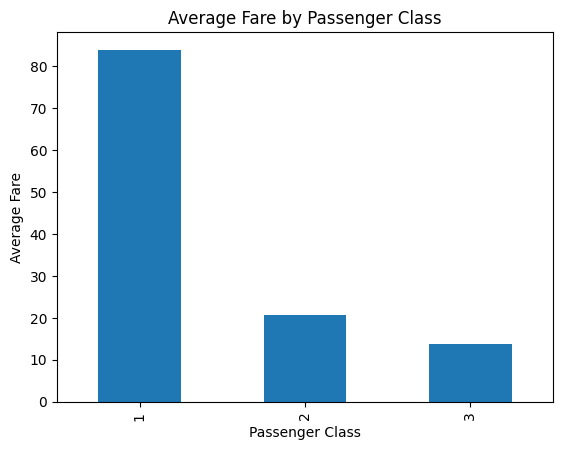

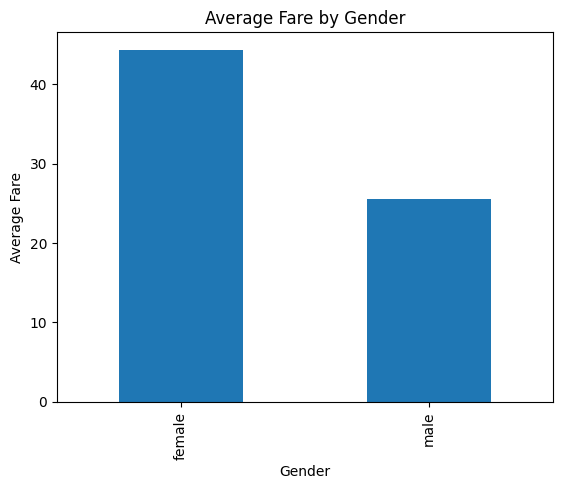

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Pclass', 'Sex', and 'Fare'

# 1. Find out the average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()

# 1.1. Plot the above using a suitable plot
average_fare_by_pclass.plot(kind='bar', title='Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

# 2. Find out the average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()

# 2.1. Plot the above using a suitable plot
average_fare_by_sex.plot(kind='bar', title='Average Fare by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Fare')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

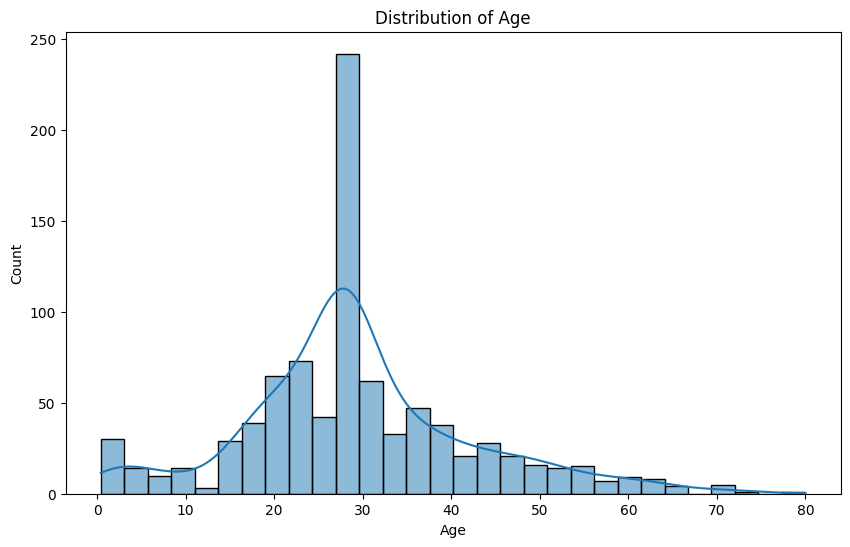

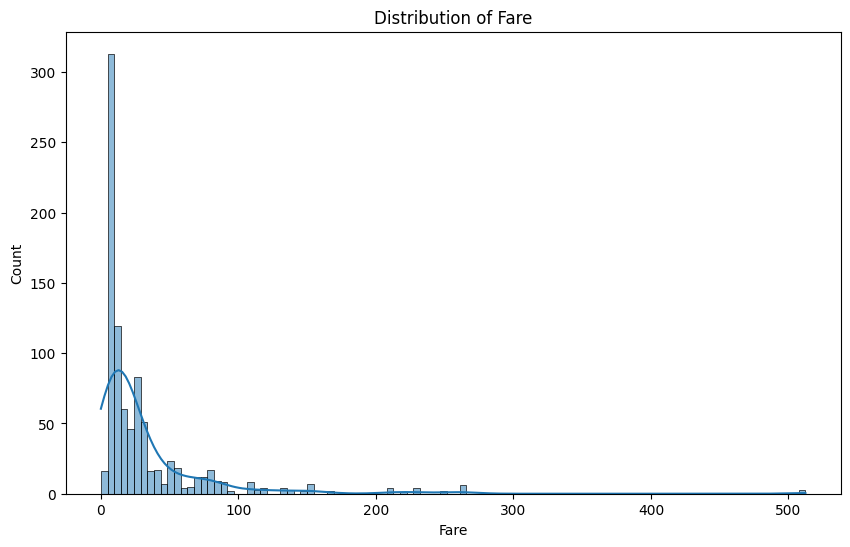

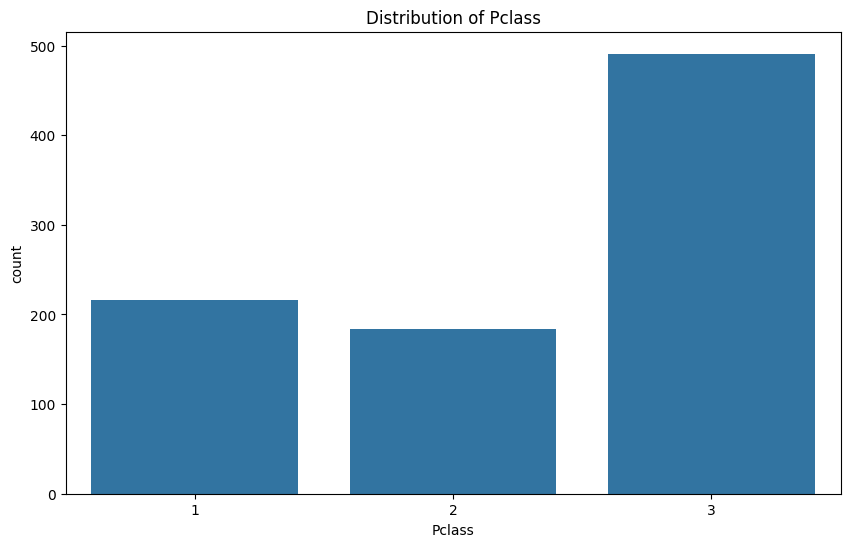

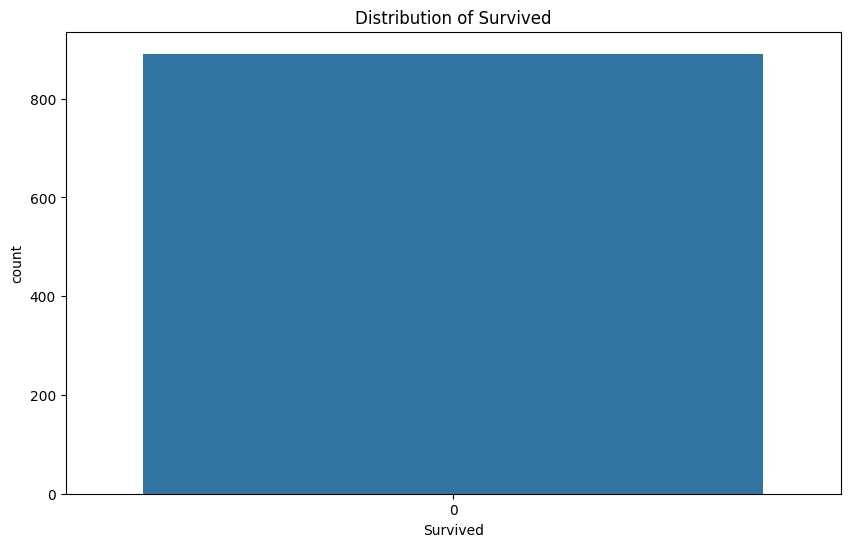

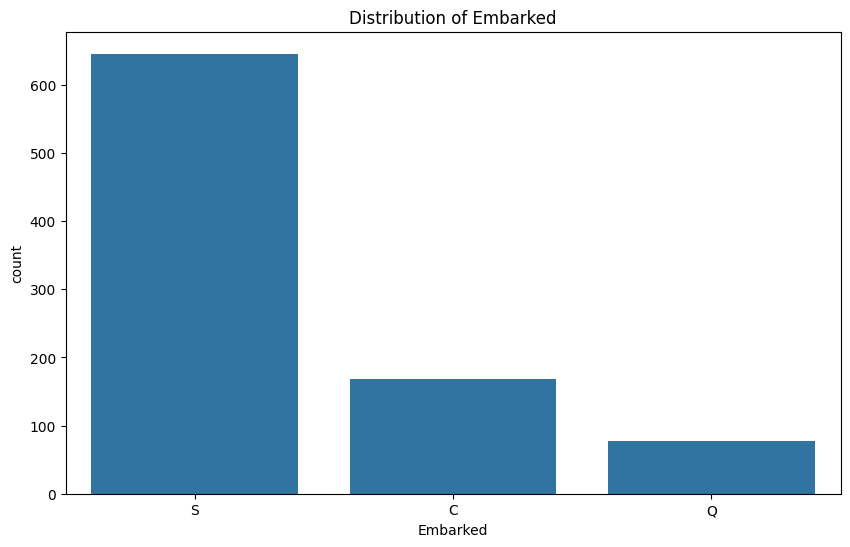

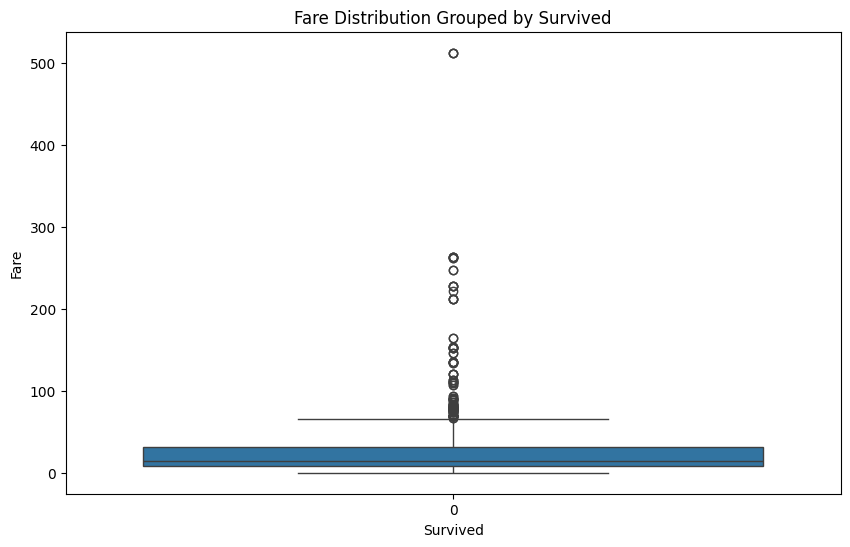

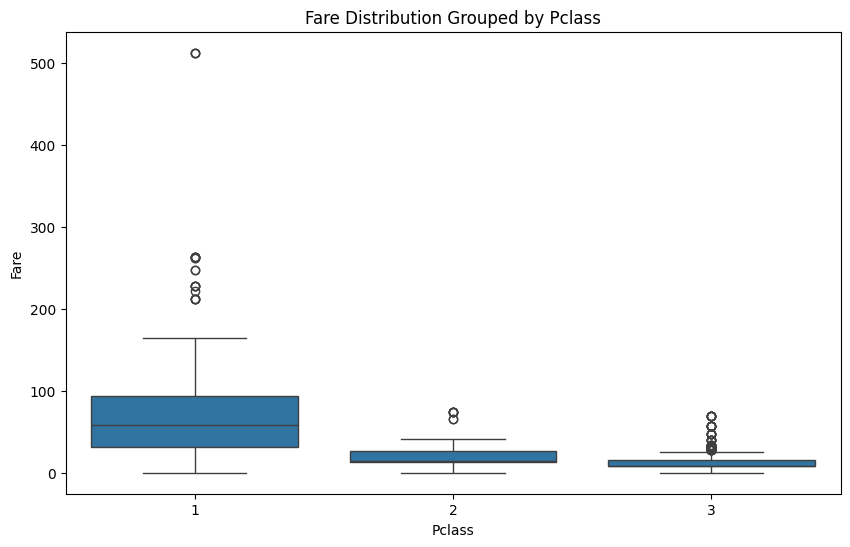

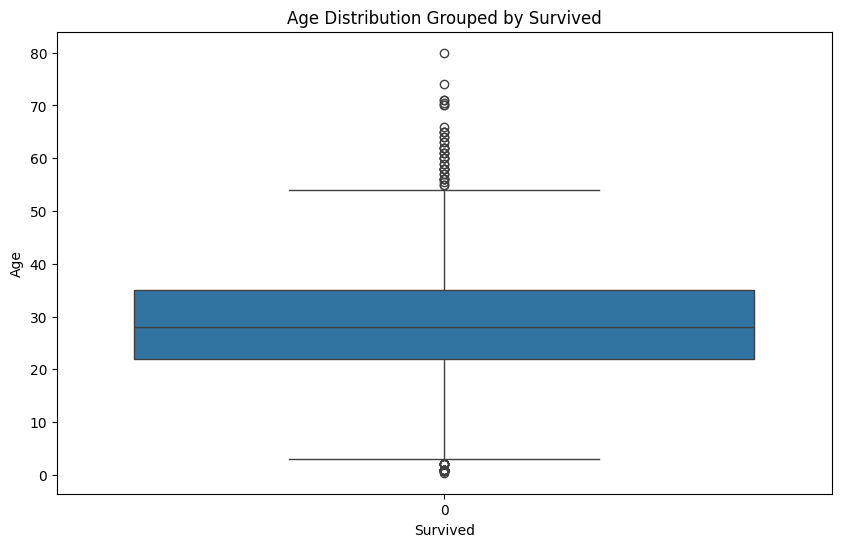

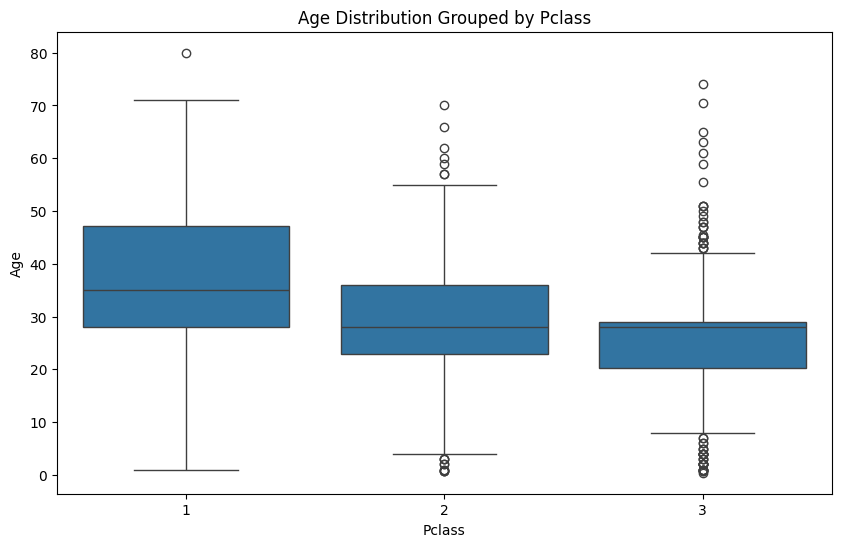

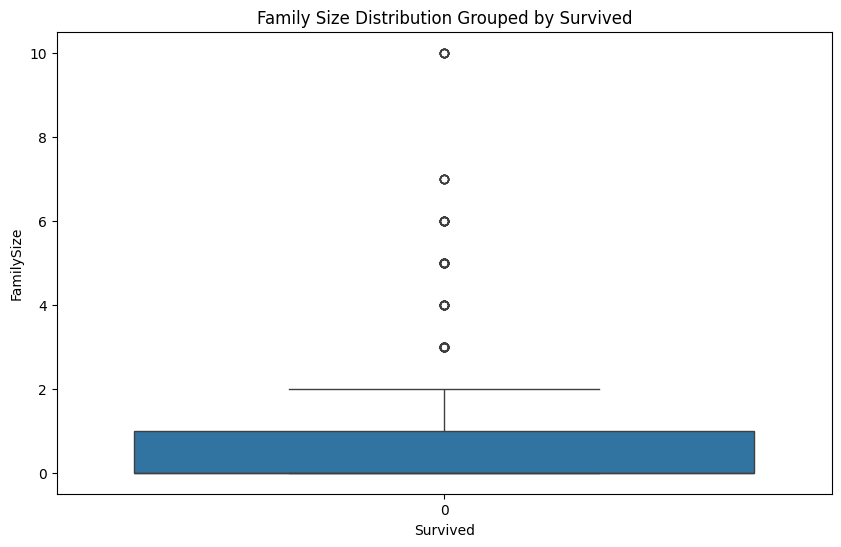

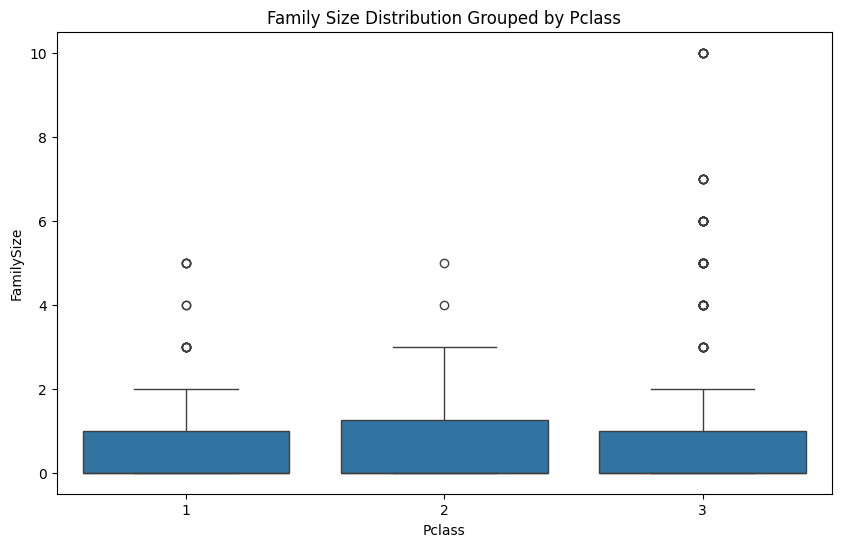

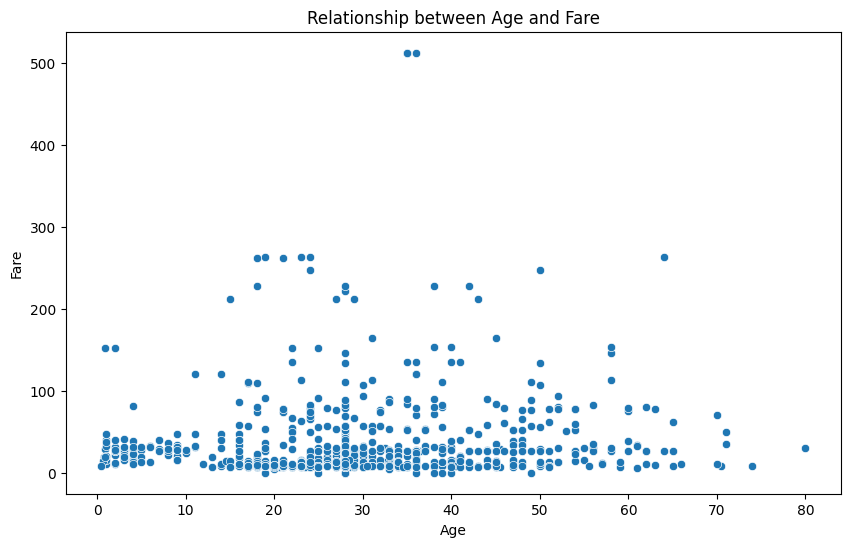

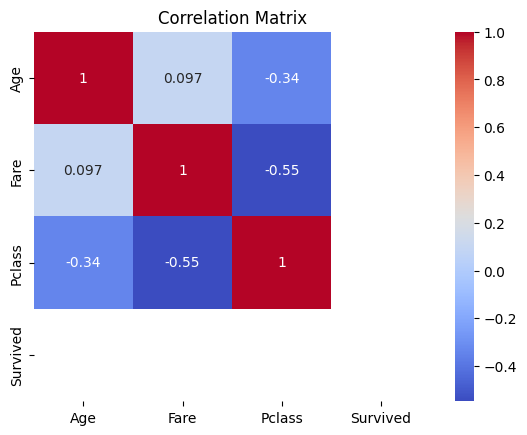

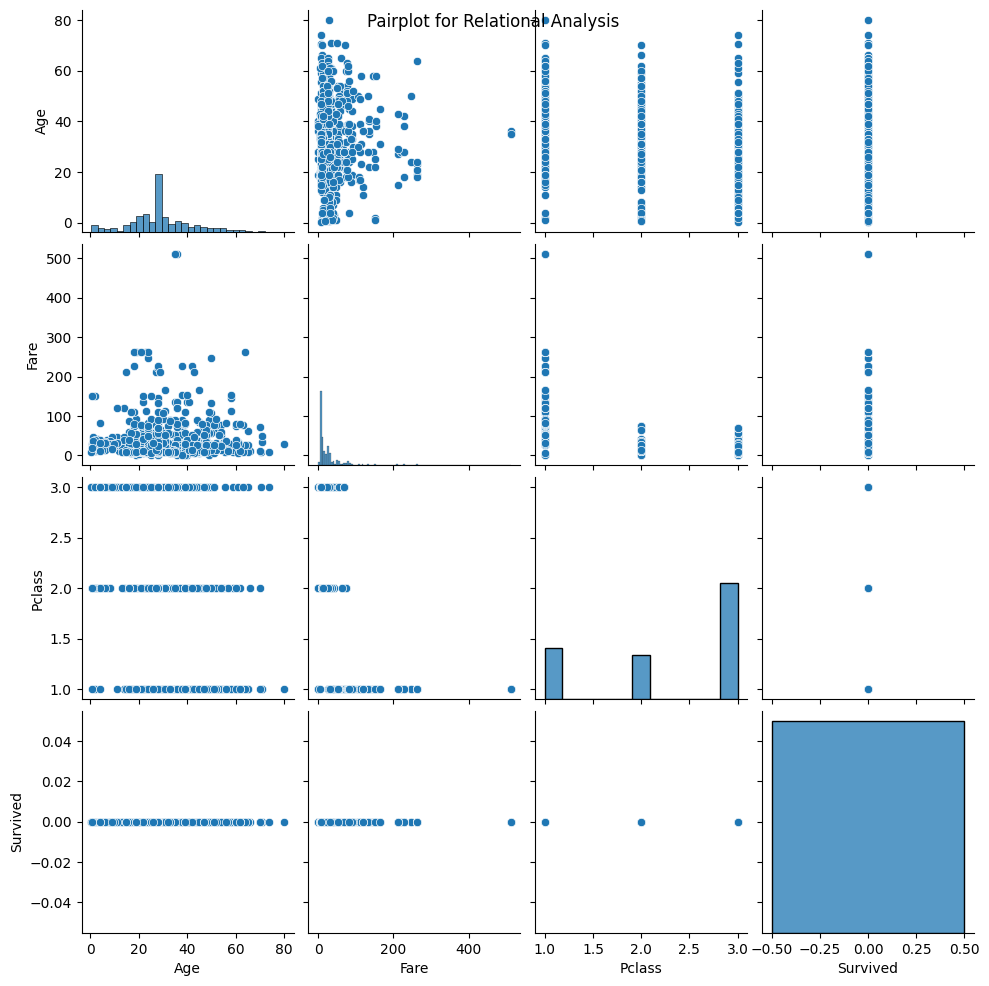

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# 1. Plot the distribution of 'Age' using a suitable plot
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

# 2. Plot the distribution of 'Fare' using a suitable plot
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare', kde=True)
plt.title('Distribution of Fare')
plt.show()

# 3. Plot the distribution of 'Pclass' using a suitable plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Pclass')
plt.show()

# 4. Plot the distribution of 'Survived' using a suitable plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survived')
plt.show()

# 5. Plot the distribution of 'Embarked' using a suitable plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Embarked')
plt.title('Distribution of Embarked')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution Grouped by Survived')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution Grouped by Pclass')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution Grouped by Survived')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'PClass'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age Distribution Grouped by Pclass')
plt.show()

# 10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Survived', y='FamilySize')
plt.title('Family Size Distribution Grouped by Survived')
plt.show()

# 11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Pclass', y='FamilySize')
plt.title('Family Size Distribution Grouped by Pclass')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Relationship between Age and Fare')
plt.show()

# 13. Are there any other possibilities to show relationships?
# Yes, you can use correlation matrix or pairplot to visualize relationships between multiple variables.
correlation_matrix = df[['Age', 'Fare', 'Pclass', 'Survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.suptitle('Pairplot for Relational Analysis')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = df.corr()
print(correlation_matrix)

correlation_age_fare = df['Age'].corr(df['Fare'])
print("Correlation between Age and Fare:", correlation_age_fare)
